<a href="https://colab.research.google.com/github/Shai670/Residential_consumption_modeling/blob/main/Solar_PV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from IPython.display import clear_output 

import matplotlib.pyplot as plt

In [2]:
!git clone https://github.com/Shai670/Residential_consumption_modeling
clear_output()

In [3]:
pv = pd.read_csv('/content/Residential_consumption_modeling/DATA/PV_1.5.csv', index_col='time')
pv.index = pd.to_datetime(pv.index)
pv

,AC
time,
2021-01-01 06:00:00,-0.450000
2021-01-01 07:00:00,-0.450000
2021-01-01 08:00:00,-0.450000
2021-01-01 09:00:00,101.638826
2021-01-01 10:00:00,355.759449
...,...
2022-01-01 01:00:00,-0.450000
2022-01-01 02:00:00,-0.450000
2022-01-01 03:00:00,-0.450000


In [4]:
load = pd.DataFrame(index=pd.date_range(start='2021-01-01 00:00:00', end='2021-12-31 23:59:00', freq='MIN'))
load['load'] = np.random.rand(len(load))
load

,load
2021-01-01 00:00:00,0.632680
2021-01-01 00:01:00,0.726252
2021-01-01 00:02:00,0.840684
2021-01-01 00:03:00,0.218871
2021-01-01 00:04:00,0.125139
...,...
2021-12-31 23:55:00,0.736845
2021-12-31 23:56:00,0.890453
2021-12-31 23:57:00,0.808115
2021-12-31 23:58:00,0.410667


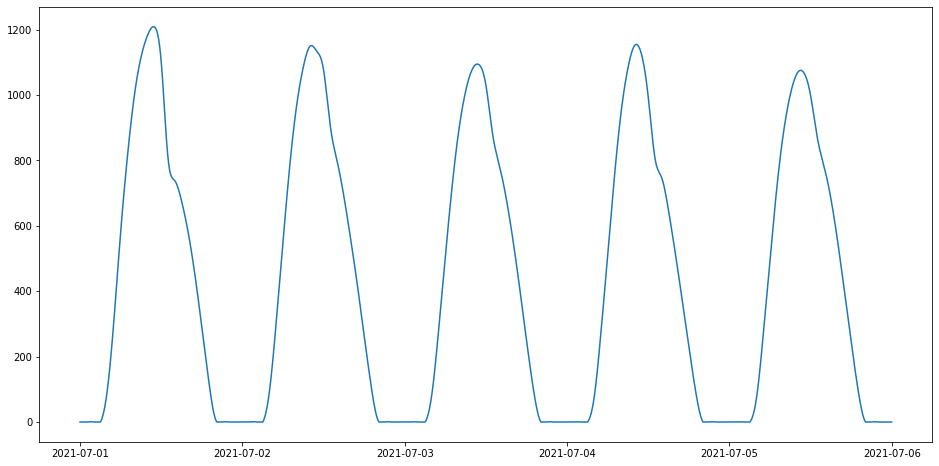

In [9]:
df = pd.merge(load, pv, left_index=True, right_index=True, how='outer').interpolate(method='polynomial', order=3).replace()
df.loc[df['AC'] < 0, 'AC'] = 0

plt.figure(figsize=(16,8))
plt.plot(df['AC'].loc['2021-07-01' : '2021-07-05'])